<a href="https://colab.research.google.com/github/jordanmsouza/TechChallenge_Fase1_Grupo4/blob/develop/Tech_Challange_Fase1_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adicionando bibliotecas

In [61]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from scipy import stats

# Vídeo Analítico Tech Challenge - Youtube

##### Link: https://youtu.be/n7nvZDWc43w

# Criando data set e realizando a análise descritiva dos dados

### Criando o Data Set

##### Referência base: https://www.kaggle.com/code/mragpavank/medical-cost-personal-datasets/input

In [62]:
dados = pd.read_csv("insurance_PT_BR.csv")
print("Exibindo as primeiras linhas do dataset:")
print(dados.head(20))

Exibindo as primeiras linhas do dataset:
    idade  genero     imc  filhos fumante    regiao     encargos
0      19  mulher  27.900       0     sim  sudoeste  16884.92400
1      18   homem  33.770       1     nao   sudeste   1725.55230
2      28   homem  33.000       3     nao   sudeste   4449.46200
3      33   homem  22.705       0     nao  noroeste  21984.47061
4      32   homem  28.880       0     nao  noroeste   3866.85520
5      31  mulher  25.740       0     nao   sudeste   3756.62160
6      46  mulher  33.440       1     nao   sudeste   8240.58960
7      37  mulher  27.740       3     nao  noroeste   7281.50560
8      37   homem  29.830       2     nao  nordeste   6406.41070
9      60  mulher  25.840       0     nao  noroeste  28923.13692
10     25   homem  26.220       0     nao  nordeste   2721.32080
11     62  mulher  26.290       0     sim   sudeste  27808.72510
12     23   homem  34.400       0     nao  sudoeste   1826.84300
13     56  mulher  39.820       0     nao   sudes

### Verificando quantidade de linhas e colunas

In [63]:
dados.shape

(1338, 7)

### Verificando os tipos dos dados

In [64]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   genero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   regiao    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Verificando dados nulos

In [65]:
celulas_nulas = dados.isnull()
total_nulos_por_coluna = celulas_nulas.sum(axis=0)
total_nulos_por_coluna

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

### Análise Descritiva dos Dados Originais

In [66]:
print("Estatísticas Descritivas dos Dados Originais:")
print(dados.describe())

Estatísticas Descritivas dos Dados Originais:
             idade          imc       filhos      encargos
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Avaliando distribuição por genero

In [67]:
dados["genero"].value_counts()

genero
homem     676
mulher    662
Name: count, dtype: int64

### Agrupando dados para entendimento de causualidade por regiao

In [68]:
dados.groupby('regiao').count()

,idade,genero,imc,filhos,fumante,encargos
regiao,,,,,,
nordeste,324,324,324,324,324,324
noroeste,325,325,325,325,325,325
sudeste,364,364,364,364,364,364
sudoeste,325,325,325,325,325,325


### Gráficos de Distribuição Geral

In [69]:
# Retirando FutureWarning dos gráficos
warnings.filterwarnings("ignore", category=FutureWarning)

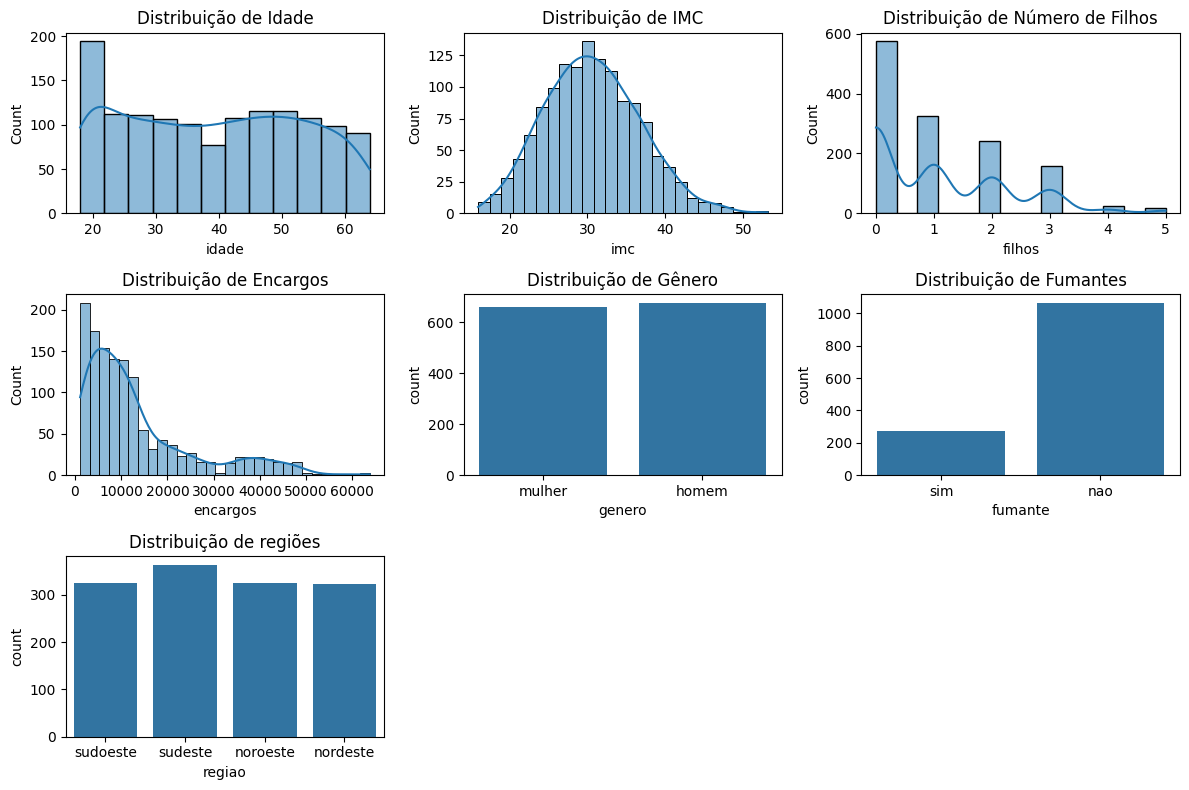

In [70]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
sb.histplot(dados['idade'], kde=True)
plt.title('Distribuição de Idade')

plt.subplot(3, 3, 2)
sb.histplot(dados['imc'], kde=True)
plt.title('Distribuição de IMC')

plt.subplot(3, 3, 3)
sb.histplot(dados['filhos'], kde=True)
plt.title('Distribuição de Número de Filhos')

plt.subplot(3, 3, 4)
sb.histplot(dados['encargos'], kde=True)
plt.title('Distribuição de Encargos')

plt.subplot(3, 3, 5)
sb.countplot(x='genero', data=dados)
plt.title('Distribuição de Gênero')

plt.subplot(3, 3, 6)
sb.countplot(x='fumante', data=dados)
plt.title('Distribuição de Fumantes')

plt.subplot(3, 3, 7)
sb.countplot(x='regiao', data=dados)
plt.title('Distribuição de regiões')

plt.tight_layout()
plt.show()

##### Os graficos acima demonstram a frequência dos elementos em relação aos atributos(features), porém alguns graficos se destacam pelas suas especifidades, sendo eles:

* O grafico de dispersão por IDADE nos mostra uma distribuição aceitável, pois as idades estão em uma linha de frequencia muito próxima uma da outra, salvo a faixa etária de 20 anos que apresenta valores altos, mas que não prejudicam representatividade como um todo.

* O grafico de IMC nos mostra uma distribuição normal (simétrica), em que os dados estão bem distribuidos ao decorrer da base.

* Já um gráfico interessante é o de encargo que nos mostra uma distribuição não normal (assimétrica a direita), apresentando potêncial a outliers.

* Temos também bem menos fumantes do que não fumantes, algo que pode inviezar o nosso modelo no momento de fazer a predição.

# Análise comparativa pré e pós-tratamento

In [71]:
contagem_fumantes = dados.groupby('idade')['fumante'].value_counts().unstack().fillna(0)

print(contagem_fumantes)

fumante  nao  sim
idade            
18        57   12
19        50   18
20        20    9
21        26    2
22        22    6
23        21    7
24        22    6
25        23    5
26        25    3
27        19    9
28        25    3
29        21    6
30        18    9
31        22    5
32        21    5
33        20    6
34        21    5
35        20    5
36        19    6
37        16    9
38        23    2
39        19    6
40        22    5
41        25    2
42        19    8
43        15   12
44        21    6
45        24    5
46        24    5
47        19   10
48        24    5
49        24    4
50        25    4
51        23    6
52        23    6
53        23    5
54        23    5
55        24    2
56        22    4
57        22    4
58        24    1
59        21    4
60        18    5
61        17    6
62        19    4
63        18    5
64        15    7


In [72]:
contagem_fumantes = dados.groupby('filhos')['fumante'].value_counts().unstack().fillna(0)

print(contagem_fumantes)

fumante  nao  sim
filhos           
0        459  115
1        263   61
2        185   55
3        118   39
4         22    3
5         17    1


In [73]:
contagem_fumantes = dados.groupby('regiao')['fumante'].value_counts().unstack().fillna(0)

print(contagem_fumantes)

fumante   nao  sim
regiao            
nordeste  257   67
noroeste  267   58
sudeste   273   91
sudoeste  267   58


### Analisando outliers

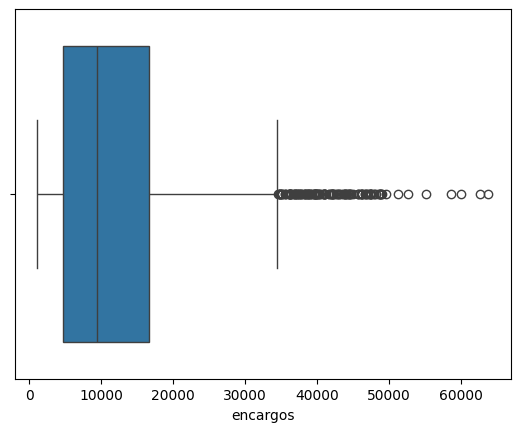

In [74]:
sb.boxplot(x=dados["encargos"]);

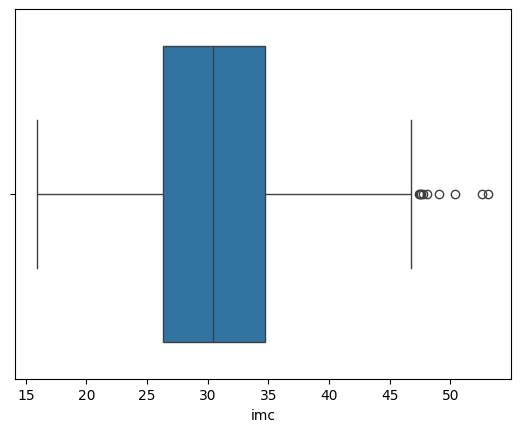

In [75]:
sb.boxplot(x=dados["imc"]);

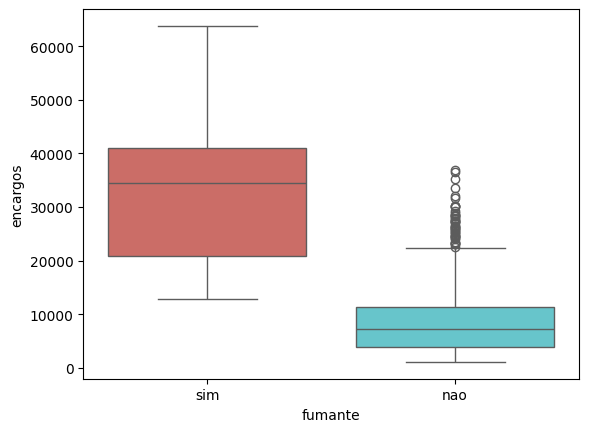

In [76]:
sb.boxplot(x="fumante",y="encargos", data=dados, palette="hls");

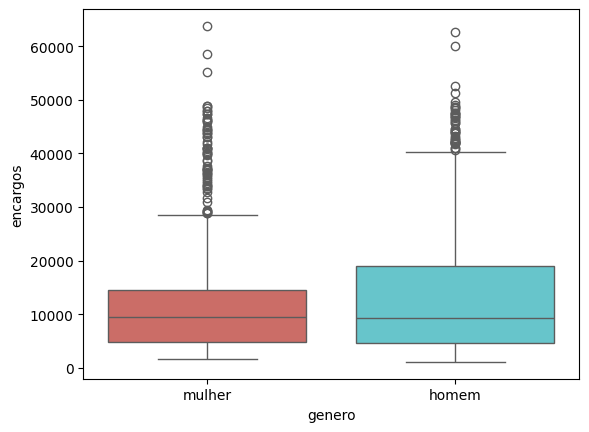

In [77]:
sb.boxplot(x="genero",y="encargos", data=dados, palette="hls");

In [78]:
df_homens = dados[(dados['genero'] == 'homem') & (dados['encargos'] > 40000)]
df_homens['encargos'].count()

47

In [79]:

df_mulheres = dados[(dados['genero'] == 'mulher') & (dados['encargos'] > 30000)]
df_mulheres['encargos'].count()

59

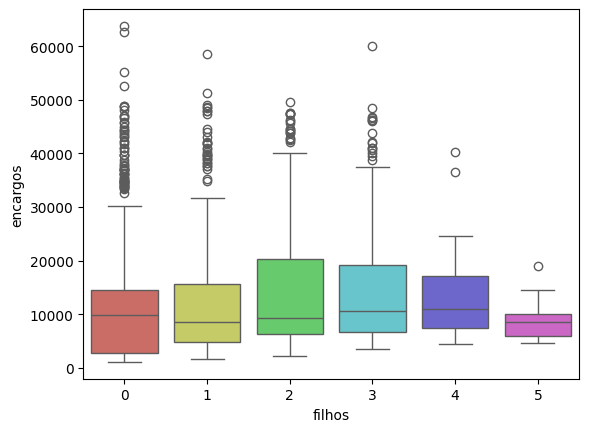

In [80]:
sb.boxplot(x="filhos",y="encargos", data=dados, palette="hls");

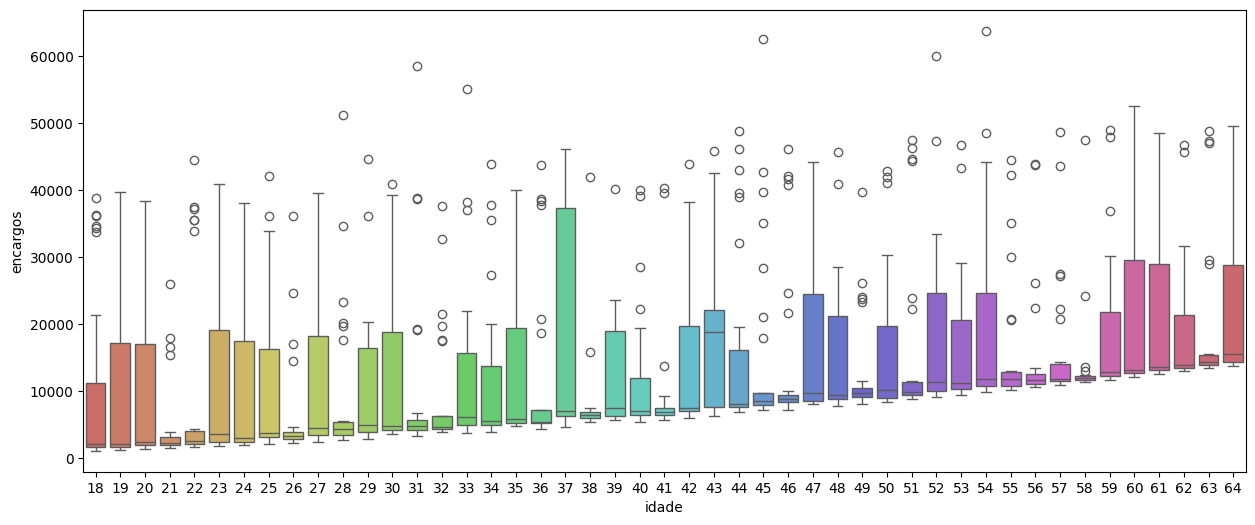

In [81]:
plt.figure(figsize=(15, 6))
sb.boxplot(x="idade",y="encargos", data=dados, palette="hls")
plt.show();

##### Os graficos de boxplot são interessantes, pois nos mostram uma visualização clara e concisa das características fundamentais dos dados, facilitando a identificação de padrões, tendências e anomalias. Conseguimos identificar muitos padrões nos graficos acima, por exemplo:

1. Encargos vs Fumantes: Onde vimos que existem diversos outliers entre os não fumantes, com valores que não justificam seus encargos elevados, já que pessoas não fumantes deveriam ter planos com menos encargos.

2. Encargos: Nos mostra uma grande concentração de outliers próximo a $35000, esse gráfico por si só não é capaz de nos ajudar indicando quem são os causadores dessas disparidades, precisando assim avaliar esta feature em conjunto com outras mais significativas.

3. Encargos vs Genero: Apresenta uma disparidade entre homens e mulheres, porém não está representando uma realidade social, dado que em decorrência da possibilidade de mulheres serem mães e utilizarem mais os convênios, as mulheres tendem a ter gastos maiores. Pressupomos que os outliers presentes nesse gráfico sejam em decorrência dos fumantes.

4. Encargos vs Filhos: Notamos algo interessante neste gráfico pois ao relacionarmos o número de filhos aos fumantes, notamos que há uma grande concentração de fumantes sem filhos, na qual pagam próximo a $30000 de encargos justificando nossa suposição dos outliers no gráfico anterior Encargos vs Genero.

5. Encargos vs Idade: Na representação do grafico de idade por encargos, reforçamos a teoria de que não há justificativa plausível para os outliers presentes na base, já que pessoas das mesma faixa etária pagam encargos discrepantes entre si.

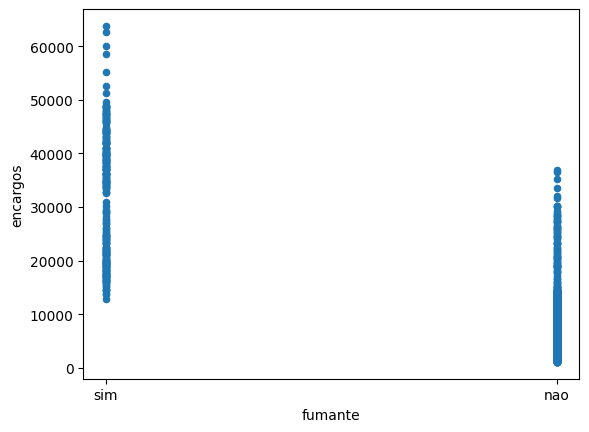

In [82]:
dados.plot.scatter(x = 'fumante', y = 'encargos');

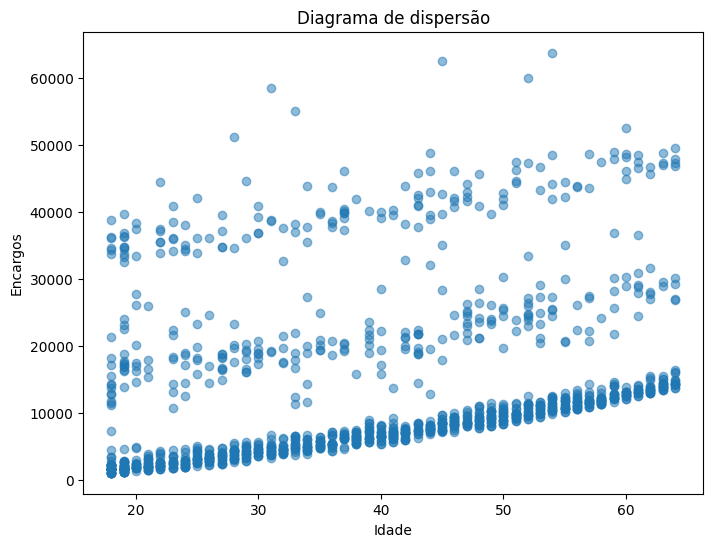

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(dados['idade'],dados['encargos'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.title('Diagrama de dispersão')
plt.show()

Nota-se que ao avaliar o grafico de dispersão acima, temos duas camadas de outliers, onde a primeira camada esta iniciando muito próximo a marca de $15000 encargos. Não há features suficientes que justifiquem esses outliers, então entendemos a necessidade da retirada destes.

### Remoção dos outliers

In [84]:
linhas_com_outliers = dados.genero.count()

In [85]:
index = dados[(dados['genero'] == 'mulher') & (dados['encargos'] > 15000)].index
dados.drop(index, inplace=True)

In [86]:
index = dados[(dados['genero'] == 'homem') & (dados['encargos'] > 15000)].index
dados.drop(index, inplace=True)



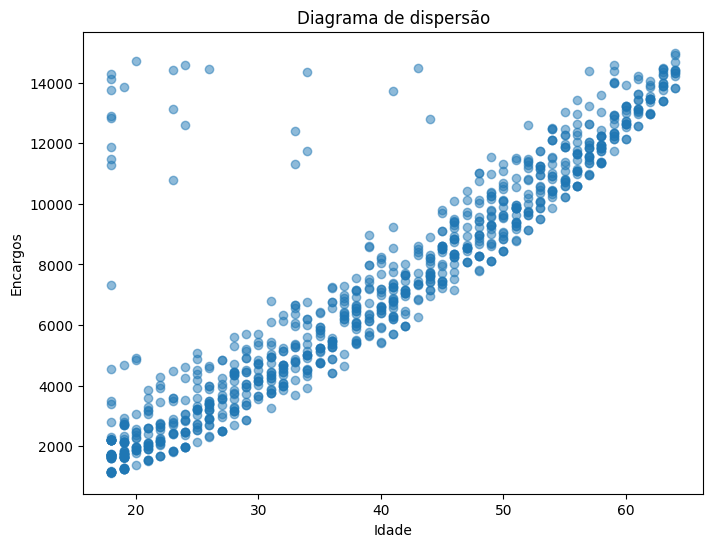

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(dados['idade'],dados['encargos'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.title('Diagrama de dispersão')
plt.show()

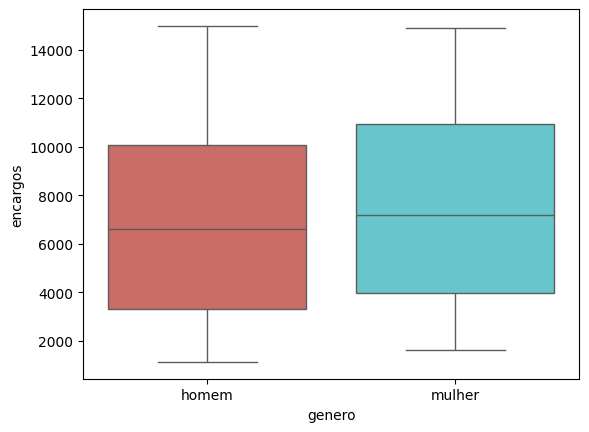

In [88]:
sb.boxplot(x="genero",y="encargos", data=dados, palette="hls");

Text(0.5, 1.0, 'Distribuição de Fumantes')

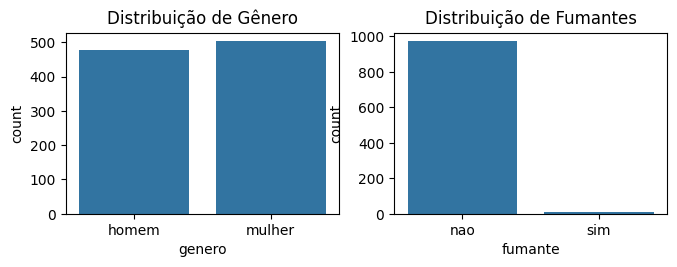

In [89]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 5)
sb.countplot(x='genero', data=dados)
plt.title('Distribuição de Gênero')

plt.subplot(3, 3, 6)
sb.countplot(x='fumante', data=dados)
plt.title('Distribuição de Fumantes')

Os graficos de distribuição acima mostram que entre homens e mulheres mesmo após a retirada dos outliers a distribuição se matem igualitária. Porém, notamos que os fumantes tiveram uma redução significativa dado a quantidade inexpressiva desses atores na base.

Podemos concluir que grande parte dos fumantes eram outliers, porém não temos features suficientes para justificar o por que essa classe estava sendo a ofensora dos encargos demasiadamente altos.

In [90]:
contagem_fumantes = dados.groupby('filhos')['fumante'].value_counts().unstack().fillna(0)
print(contagem_fumantes)

fumante    nao  sim
filhos             
0        431.0  5.0
1        242.0  0.0
2        162.0  2.0
3        104.0  0.0
4         17.0  0.0
5         17.0  0.0


In [91]:
contagem_fumantes = dados.groupby('regiao')['fumante'].value_counts().unstack().fillna(0)
print(contagem_fumantes)

fumante     nao  sim
regiao              
nordeste  230.0  5.0
noroeste  243.0  1.0
sudeste   248.0  0.0
sudoeste  252.0  1.0


In [92]:
print("Estatísticas Descritivas dos Dados sem outliers:")
dados.describe()

Estatísticas Descritivas dos Dados sem outliers:


,idade,imc,filhos,encargos
count,980.000000,980.000000,980.000000,980.000000
mean,38.845918,30.492469,1.056122,7112.209423
std,13.984076,6.150983,1.211923,3869.930786
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.101250,0.000000,3701.622875
50%,39.000000,30.200000,1.000000,6789.108725
75%,51.000000,34.320000,2.000000,10411.043550
max,64.000000,53.130000,5.000000,14988.432000


### Percentual de outliers removidos da base

In [93]:
linhas_sem_outliers = dados.genero.count()
percentual_outliers_removidos = (linhas_com_outliers - linhas_sem_outliers) / linhas_com_outliers
print(f"\nTotal de outliers removidos: {percentual_outliers_removidos:.2%}")


Total de outliers removidos: 26.76%


# Padronizações dos dados

### Padronização LabelEcoder

In [94]:
label_enconder = LabelEncoder()
dados_antigos = dados.copy(deep=True)

dados["fumante"] = label_enconder.fit_transform(dados["fumante"])
dados["genero"] = label_enconder.fit_transform(dados["genero"])

df = pd.get_dummies(dados["regiao"], prefix = "dummy")
dados = pd.concat([dados, df], axis=1)
dados.drop(["regiao"], axis=1, inplace = True)



### Apresentando dados categoricos padronizados

In [95]:
dados.head()

,idade,genero,imc,filhos,fumante,encargos,dummy_nordeste,dummy_noroeste,dummy_sudeste,dummy_sudoeste
1,18,0,33.77,1,0,1725.5523,False,False,True,False
2,28,0,33.00,3,0,4449.4620,False,False,True,False
4,32,0,28.88,0,0,3866.8552,False,True,False,False
5,31,1,25.74,0,0,3756.6216,False,False,True,False
6,46,1,33.44,1,0,8240.5896,False,False,True,False


### Reapresentando dados categoricos antigos para comparação

In [96]:
dados_antigos.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
1,18,homem,33.77,1,nao,sudeste,1725.5523
2,28,homem,33.00,3,nao,sudeste,4449.4620
4,32,homem,28.88,0,nao,noroeste,3866.8552
5,31,mulher,25.74,0,nao,sudeste,3756.6216
6,46,mulher,33.44,1,nao,sudeste,8240.5896


### Analisando correlações

In [97]:
matrix_correlacao = dados.corr()
matrix_correlacao["encargos"].sort_values(ascending=False)

encargos          1.000000
idade             0.896298
fumante           0.152432
filhos            0.136211
dummy_nordeste    0.083534
genero            0.079782
imc               0.073263
dummy_sudoeste    0.000794
dummy_noroeste    0.000645
dummy_sudeste    -0.083475
Name: encargos, dtype: float64

### Teste de normalidade

In [98]:
_, p_value_idade = stats.shapiro(dados['idade'])
_, p_value_encargos = stats.shapiro(dados['encargos'])
print(f"\nTeste de Shapiro-Wilk para normalidade:")
print(f"Idade: p-value = {p_value_idade:.5f}")
print(f"Encargos: p-value = {p_value_encargos:.5f}")


Teste de Shapiro-Wilk para normalidade:
Idade: p-value = 0.00000
Encargos: p-value = 0.00000


### Teste t para comparação de médias entre fumantes e não fumantes

In [99]:
fumantes = dados[dados['fumante'] == 1]['encargos']
nao_fumantes = dados[dados['fumante'] == 0]['encargos']
t_stat, p_value_t = stats.ttest_ind(fumantes, nao_fumantes)
print(f"\nTeste t para comparação de médias entre fumantes e não fumantes:")
print(f"t-statistic = {t_stat:.5f}, p-value = {p_value_t:.5f}")


Teste t para comparação de médias entre fumantes e não fumantes:
t-statistic = 4.82338, p-value = 0.00000


# Iniciando Validação Cruzada

### Definindo a target.

In [100]:
x = dados.drop(columns=['encargos'])
y = dados["encargos"]

In [101]:
x.head()

,idade,genero,imc,filhos,fumante,dummy_nordeste,dummy_noroeste,dummy_sudeste,dummy_sudoeste
1,18,0,33.77,1,0,False,False,True,False
2,28,0,33.00,3,0,False,False,True,False
4,32,0,28.88,0,0,False,True,False,False
5,31,1,25.74,0,0,False,False,True,False
6,46,1,33.44,1,0,False,False,True,False


In [102]:
y.head()

1    1725.5523
2    4449.4620
4    3866.8552
5    3756.6216
6    8240.5896
Name: encargos, dtype: float64

### Aplicar validação cruzada k-fold

In [103]:
forest_model = RandomForestRegressor(n_estimators=10, random_state=42)
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(forest_model, x, y, cv=5)
mean_mse = scores.mean()
print(f"\nK-Fold (R^2) Scores: {scores}")
print(f"Média do Erro Médio Quadrático (MSE) utilizando Cross-Validation: {mean_mse:.5f}")
print(f"Raiz do Erro Médio Quadrático (RMSE) utilizando Cross-Validation: {np.sqrt(mean_mse):.5f}")


K-Fold (R^2) Scores: [0.96334621 0.86315521 0.93473627 0.92907752 0.69219854]
Média do Erro Médio Quadrático (MSE) utilizando Cross-Validation: 0.87650
Raiz do Erro Médio Quadrático (RMSE) utilizando Cross-Validation: 0.93622


### Divisão entre treino e teste

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Padronizando dados de treino e teste

In [105]:
scaler_std = StandardScaler()
scaler_std.fit(x_train)
x_dados_std_train = scaler_std.fit_transform(x_train)
x_dados_std_test = scaler_std.fit_transform(x_test)

In [106]:
x_dados_std_train

array([[-0.86973453, -1.00768257,  0.42065326, ...,  1.68059223,
        -0.57735027, -0.57342267],
       [-1.15560472,  0.992376  ,  0.46066737, ..., -0.59502834,
        -0.57735027,  1.74391431],
       [ 0.70255152, -1.00768257,  1.02413127, ..., -0.59502834,
         1.73205081, -0.57342267],
       ...,
       [-0.08359151, -1.00768257, -0.21548932, ...,  1.68059223,
        -0.57735027, -0.57342267],
       [ 0.48814888,  0.992376  ,  0.5137473 , ..., -0.59502834,
        -0.57735027, -0.57342267],
       [ 0.98842171,  0.992376  ,  1.11885854, ...,  1.68059223,
        -0.57735027, -0.57342267]])

In [107]:
x_dados_std_test

array([[ 1.18854883,  0.90267093, -0.20285023, ..., -0.4984051 ,
        -0.60092521, -0.65624457],
       [ 0.97177876, -1.10782342,  0.23902833, ...,  2.00640002,
        -0.60092521, -0.65624457],
       [-1.41269204, -1.10782342,  0.68732255, ..., -0.4984051 ,
         1.66410059, -0.65624457],
       ...,
       [ 1.40531891,  0.90267093,  0.05618203, ...,  2.00640002,
        -0.60092521, -0.65624457],
       [ 1.54983229, -1.10782342,  1.11556784, ..., -0.4984051 ,
        -0.60092521,  1.52382213],
       [ 0.82726538,  0.90267093, -1.20850489, ...,  2.00640002,
        -0.60092521, -0.65624457]])

### Verifcando frequencia após padronização

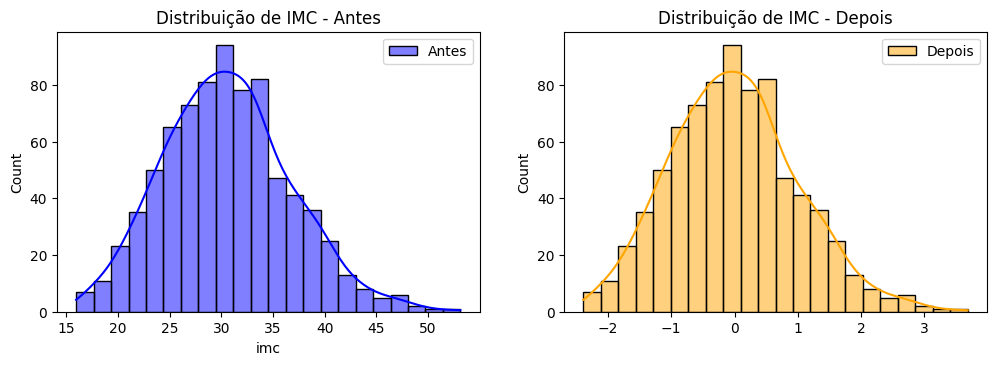

In [108]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sb.histplot(x_train['imc'], kde=True, color='blue', label='Antes')
plt.title('Distribuição de IMC - Antes')
plt.legend();

plt.subplot(2, 2, 2)
sb.histplot(x_dados_std_train[:, 2], kde=True, color='orange', label='Depois')
plt.title('Distribuição de IMC - Depois')
plt.legend();

O Objetivo do grafico acima foi identificar se teve diferença nos dados não padronizado em relação aos padronizado. Porém, como podemos notar a frequencia permanece a mesma.

# Iniciando Modelo De Random Forest

### Treinando modelo

In [109]:
forest_model.fit(x_dados_std_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

### Fazendo previsões nos dados de teste

In [110]:
y_pred_forest = forest_model.predict(x_dados_std_test)

### Avaliando o desempenho do modelo

In [111]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f"\nErro médio quadrático (MSE) - Floresta Aleatória: {mse_forest:.5f}")
print(f"Raiz do erro médio quadrático (RMSE) - Floresta Aleatória: {rmse_forest:.5f}")
print(f"Coeficiente de determinação (R^2) - Floresta Aleatória: {r2_forest:.5f}")


Erro médio quadrático (MSE) - Floresta Aleatória: 2642117.76544
Raiz do erro médio quadrático (RMSE) - Floresta Aleatória: 1625.45925
Coeficiente de determinação (R^2) - Floresta Aleatória: 0.82142


In [112]:
def calc_mape(targets, predictions):
  errors = np.abs(targets - predictions)
  relative_errors = errors / np.abs(targets)
  mape = np.mean(relative_errors) * 100
  return mape

In [113]:
print(f"MAPE: {calc_mape(y_test, y_pred_forest): .2f}%")

MAPE:  15.66%


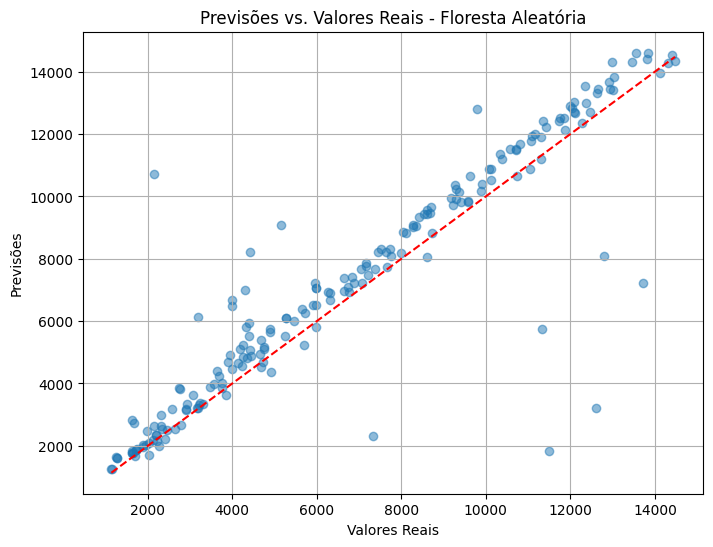

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Floresta Aleatória')
plt.grid(True)
plt.show()

Ao analisarmos o grafico verifcamos que grande parte dos pontos estão muito próximo a reta, apesar de existirem em algumas regiões pontos fora dela.

Podemos assim afirmar, que o modelo de Random Forest conseguiu um alinhamento favorável dos dados seguindo uma certa tendência, porém, ainda existem muitos pontos dispersos não alcançando uma linearidade desejada, mantendo assim o coeficiente de determinação em 0,82.

# Iniciando Modelo De Regressão Linear

In [115]:
model = LinearRegression()
model.fit(x_dados_std_train, y_train)

LinearRegression()

In [116]:
y_pred_linear = model.predict(x_dados_std_test)

In [117]:
mse = mean_squared_error(y_test,y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_linear)
print(f"\nErro médio quadrático (MSE): {mse:.5f}")
print(f"Erro médio quadrático (RMSE): {rmse:.5f}")
print(f"Coeficiente de determinação (R^2): {r2:.5f}")


Erro médio quadrático (MSE): 2042770.22465
Erro médio quadrático (RMSE): 1429.25513
Coeficiente de determinação (R^2): 0.86193


In [118]:
print(f"MAPE: {calc_mape(y_test, y_pred_linear): .2f}%")

MAPE:  14.03%


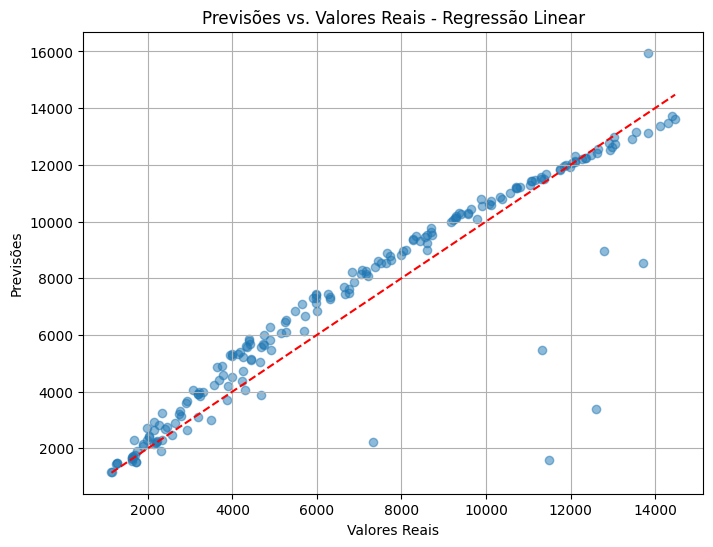

In [119]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Regressão Linear')
plt.grid(True)
plt.show()

Já ao analisarmos o grafico de Regressão Linear verifcamos que apesar de os pontos não estarem todos sobre a reta, apresentando uma certa deformação em algumas regiões. O modelo conseguiu um melhor alinhamento dos dados aproximando-os mais a reta, mesmo não alcançando uma linearidade desejesada em relação ao modelo de Random Forest, portanto o modelo de Regressão Linear perfomou melhor alcançando o coeficiente de determinação de 0,86.